# What is Snap.py?

Snap.py is a Python interface for SNAP. SNAP is a general purpose, high performance system for analysis and manipulation of large networks. SNAP is written in C++ and optimized for maximum performance and compact graph representation. It easily scales to massive networks with hundreds of millions of nodes, and billions of edges.

Snap.py provides performance benefits of SNAP, combined with flexibility of Python.Since Snap.py is mostly just a direct interface to SNAP C++ implementation, most of the SNAP functionality is available via Snap.py in Python. There is a direct correspondence between the SNAP functions and Snap.py functions. SNAP documentation is available here: http://snap.stanford.edu/snap/doc/snapdev-ref/.

To use Snap.py in Python, import the snap module:

In [1]:
 import snap

# Graph Types

Snap.py supports graphs and networks. Graphs describe topologies, where nodes have unique integer ids and directed/undirected/multiple edges connect the nodes of the graph.

Graph classes in SNAP:

* TUNGraph: undirected graphs (single edge between an unordered pair of nodes)
* TNGraph: directed graphs (single directed edge between an ordered pair of nodes)


# Graph Creation

Graphs are created with the New() method. Examples of how to create graphs and networks:

In [2]:
G1 = snap.TUNGraph.New()
G2 = snap.TNGraph.New()

By definition, a **Graph** is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

# Adding Nodes and Edges
Nodes are added with the AddNode() method.

In [4]:
G1.AddNode(1)
G1.AddNode(5)
G1.AddNode(32)

32

Nodes have unique integer node ids. There is no restriction for node ids to be contiguous integers starting at 0.

Edges are added with the AddEdge() method.

In [5]:
G1.AddEdge(1,5)
G1.AddEdge(5,1)
G1.AddEdge(5,32)

-1

In TUNGraph and TNGraph edges have no explicit ids – edges are identified by a pair of node ids.

# Traversing Nodes and Edges

Nodes and edges are traversed with iterators. Some examples of iterator usage in Snap.py are shown below.

In [49]:
#Create a directed random graph on 5 nodes and 10 edges:

G2 = snap.GenRndGnm(snap.PNGraph, 5, 10) 

#Traverse all the nodes using a node iterator:
for NI in G2.Nodes():
    print "node: %d, out-degree %d, in-degree %d" % (
        NI.GetId(), NI.GetOutDeg(), NI.GetInDeg())

#Traverse all the edges using an edge iterator:
for EI in G2.Edges():
    print "edge (%d, %d)" % (EI.GetSrcNId(), EI.GetDstNId())

#Traverse the edges by traversing nodes and getting all their neighbors:

for NI in G2.Nodes():
    for Id in NI.GetOutEdges():
        print "edge (%d, %d)" % (NI.GetId(), Id)

node: 0, out-degree 4, in-degree 2
node: 1, out-degree 1, in-degree 1
node: 2, out-degree 1, in-degree 2
node: 3, out-degree 3, in-degree 3
node: 4, out-degree 1, in-degree 2
edge (0, 1)
edge (0, 2)
edge (0, 3)
edge (0, 4)
edge (1, 0)
edge (2, 3)
edge (3, 0)
edge (3, 2)
edge (3, 4)
edge (4, 3)
edge (0, 1)
edge (0, 2)
edge (0, 3)
edge (0, 4)
edge (1, 0)
edge (2, 3)
edge (3, 0)
edge (3, 2)
edge (3, 4)
edge (4, 3)


# Loading Graphs

One can load a graph stored in a file using common graph formats, such as edge lists, adjacency lists,

In [14]:
import pandas as pd
df = pd.read_csv("lesmis.csv")
df.head()

,1,2
0,2,3
1,2,4
2,2,5
3,2,6
4,2,7


In [10]:
G = snap.LoadEdgeList(snap.PUNGraph, "lesmis.csv", 0, 1, ",")

# Generating graphs
One can generate grapphs uing stochastic graph generators

In [11]:
#Create a directed random graph on 5 nodes and 10 edges:
G = snap.GenRndGnm(snap.PUNGraph, 100, 1000)

# Saving Graphs
One can save graphs in a file using common graph formats, such as edge lists, adjacency lists, 

In [20]:
snap.SaveEdgeList(G2, "random.tsv")

# Hash Table Types
Hash tables contain values of the same type. Each value has a user provided key associated with it. All the keys are of the same type.

Table values can be accessed or changed either their keys. New values can be added as (key, value) pairs.

Hash table types in Snap.py and SNAP use a naming convention of being named as <key_type_name><value_type_name>, followed by H. For example, a hash table with integer key and string values is named TIntStrH. If <key_type_name> and <value_type_name> have the same type, only one type name might be used, such as TIntH.

Below are the most commonly used hash table operations:

In [ ]:
# create an empty hash table with integer keys and string values

h = snap.TIntStrH()

#add a value to the table. 5 values are added below:
h[5] = "five"
h[3] = "three"
h[9] = "nine"
h[6] = "six"
h[1] = "one"

#get the number of values in the table:
print h.Len()

#get a value for a specific key
print "h[3] =", h[3]

#change a value at a specific key
h[3] = "four"
print "h[3] =", h[3]

# 1 Ranking: PageRank
-------------------------------------------
    GetPageRank(Graph, PRankH, C=0.85, Eps=1e-4, MaxIter=100)\

-------------------------------------------    
* Computes the PageRank score of every node in Graph. The scores are stored in PRankH.

* ### Parameters:

 1. Graph: graph (input)
A Snap.py graph or a network.

 2. PRankH: TIntFltH, a hash of int keys and float values (output). PageRank scores. Keys are node IDs, values are computed PageRank scores.

 3. C: float (input). Damping factor.

 4. Eps: float (input). Convergence difference.

 5. MaxIter: int (input). Maximum number of iterations.

* ### Return value: None

The following example shows how to calculate PageRank scores for nodes in TUNGraph:

In [26]:
G = snap.LoadEdgeList(snap.PUNGraph, "lesmis.csv", 0, 1, ",")
PRankH = snap.TIntFltH()
snap.GetPageRank(G, PRankH)

print "Node, PRankH"
print 1, ",",  PRankH[1]
print 2, ",", PRankH[2]
print 3, ",", PRankH[3]
print 4, ",", PRankH[4]
print 5, ",", PRankH[5]

Node, PRankH
1 , 0.00558789976989
2 , 0.0427808245273
3 , 0.010281579539
4 , 0.010281579539
5 , 0.00558789976989


# 2. Community Detection
-------------------------------------------
    CommunityGirvanNewman(Graph, CmtyV)
    
-------------------------------------------    
* Uses the Girvan-Newman community detection algorithm based on betweenness centrality on Graph. Fills CmtyV with all the communities detected and returns the modularity of the network.

* ### Parameters:

 1. Graph: undirected graph (input). A Snap.py undirected graph.
 2. CmtyV: TCnComV, a vector of connected components (output). A vector of all the communities that are detected by the Girvan-Newman method. Each community is represented as a vector of node ids.

* ### Return value: float. The modularity of the network.

The following example shows how to detect communities using Girvan-Newman algorithm in TUNGraph:

In [35]:
G = snap.LoadEdgeList(snap.PUNGraph, "lesmis.csv", 0, 1, ",")
CmtyV = snap.TCnComV()
modularity = snap.CommunityGirvanNewman(G, CmtyV)
i = 1;
for Cmty in CmtyV:
    print "Community " + str(i) +": ",
    for NI in Cmty:
        print NI,
    i+=1;
    print ''
print "The modularity of the network is %f" % modularity

Community 1:  11 12 14 15 16 30 32 33 34 35 36 37 38 39 
Community 2:  49 56 58 59 60 61 62 63 64 65 66 67 77 
Community 3:  25 26 28 40 42 43 69 70 71 72 76 
Community 4:  27 44 50 51 52 53 54 55 57 73 
Community 5:  13 17 18 19 20 21 22 23 24 31 
Community 6:  1 2 3 4 5 6 7 8 9 10 
Community 7:  29 45 46 
Community 8:  74 75 
Community 9:  47 48 
Community 10:  68 
Community 11:  41 
The modularity of the network is 0.538068


# 3 Dimensionality Reduction (Node Embedding): EigenDecomposition
-----------------------------------
    GetEigVec(Graph, EigVecs, EigVal, EigVecV)

-----------------------------------

* Computes top EigVecs eigenvalues and eigenvectors of the adjacency matrix representing a given undirected Graph.

* ### Parameters:

 1. Graph: graph (input). A Snap.py undirected Graph.

 2. EigVecs: int (input). Rank of eigenvalues and eigenvectors that should be outputted.

 3. EigValV: TFltV, a vector of floats (output). Eigenvalues.

 4. EigVecV: TFltVFltV> (output). Eigenvectors.

* ### Return value: None

The following example shows how to calculate the top 2 eigenvalues and eigenvectors for TUNGraph:

Node Feature-1 Feature-2
1 -0.0503371934489 -0.0160401894852
2 -0.0463882395065 -0.0140224941048
3 -0.0463882395065 -0.0140224941048
4 -0.00561841503775 -0.00229914731314
5 -0.00561841503775 -0.00229914731314


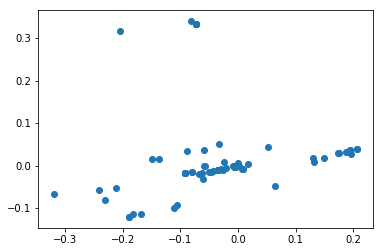

In [48]:
import matplotlib.pyplot as plt

Graph = snap.LoadEdgeList(snap.PUNGraph, "lesmis.csv", 0, 1, ",")
EigValV = snap.TFltV()
EigVecV = snap.TFltVFltV()
snap.GetEigVec(Graph, 10, EigValV, EigVecV)

print "Node", "Feature-1", "Feature-2" 
print 1, EigVecV[1][1], EigVecV[2][1]
print 2, EigVecV[1][2], EigVecV[2][2]
print 3, EigVecV[1][3], EigVecV[2][3]
print 4, EigVecV[1][4], EigVecV[2][4]
print 5, EigVecV[1][5], EigVecV[2][5]

plt.plot()
plt.scatter(EigVecV[1], EigVecV[2])

We can run any off-the-shelf classification and clustering methods using the obtained node features.

# References
 1. Snap.py Tutorial (https://snap.stanford.edu/snappy/doc/tutorial/index-tut.html)